In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import sympy as sp
import sympy.plotting as spp
from sympy import symbols, diff, Poly, solve
import random
from mpl_toolkits.mplot3d import Axes3D



In [20]:
# Defining Functions

def model(t, x0, alpha):
    # Cap the exponent to avoid overflow
    # capped_exponent = np.minimum(alpha * t, 1000)
    return x0 * np.exp(alpha * t)

def sse(params, t_data, x_data):
    x0, alpha = params
    predictions = model(t_data, x0, alpha)
    
    return np.sum((x_data - predictions) ** 2)





#GENERATE DATA 
# alpha = 2
# x0 = 1
# t = [0, 2]

def data_gen(num_data_points, noise_level):
    t = np.linspace(0, 2, num_data_points)
    x = np.exp(2 * t)  # Using a fixed 'true' alpha=2 for data generation
    noise = np.random.normal(0, noise_level, x.shape)
    x_noisy = x + noise
    data = pd.DataFrame({'Time': t, 'Data': x_noisy})
    return data

def run_optimization(num_runs, initial_guess, data, bounds=None):
    # Running the optimization
    final_params = []
    for _ in range(num_runs):
        result = minimize(sse, initial_guess, args=(data['Time'], data['Data']), method='L-BFGS-B', bounds=bounds)
        
        # Check if the optimization was successful
        if result.success:
            final_params.append(result.x)
        else:
            # Handle unsuccessful optimization
            # For example, append None or log an error message
            final_params.append(None)

            print(f"Optimization failed: {result.message} for (x0, alpha) = {initial_guess}")

    # Filter out None values if there are any
    final_params = [param for param in final_params if param is not None]

    return np.array(final_params)



#Compute the error matrix using run_optimization and calculate_error.

def error_matrix(alpha_range, x0_range, data):
    # Initialize a matrix to store the errors
    error_matrix = np.ones((len(alpha_range), len(x0_range)))
    for i in range(len(error_matrix)):
        for j in range(len(error_matrix[0])):
            error_matrix[i][j] = 10
    # Fill in the matrix
    for i, alpha in enumerate(alpha_range):
        for j, x0 in enumerate(x0_range):
            initial_guess = (x0, alpha)
            final_param = run_optimization(num_runs, initial_guess, data)
            if len(final_param) > 0:
                error = calculate_error(final_param[0], data)
                error_matrix[i, j] = error
            else:
                error_matrix[i, j] = np.inf
    return error_matrix




/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH for (x0, alpha) = (-5.0, 4.795918367346939)


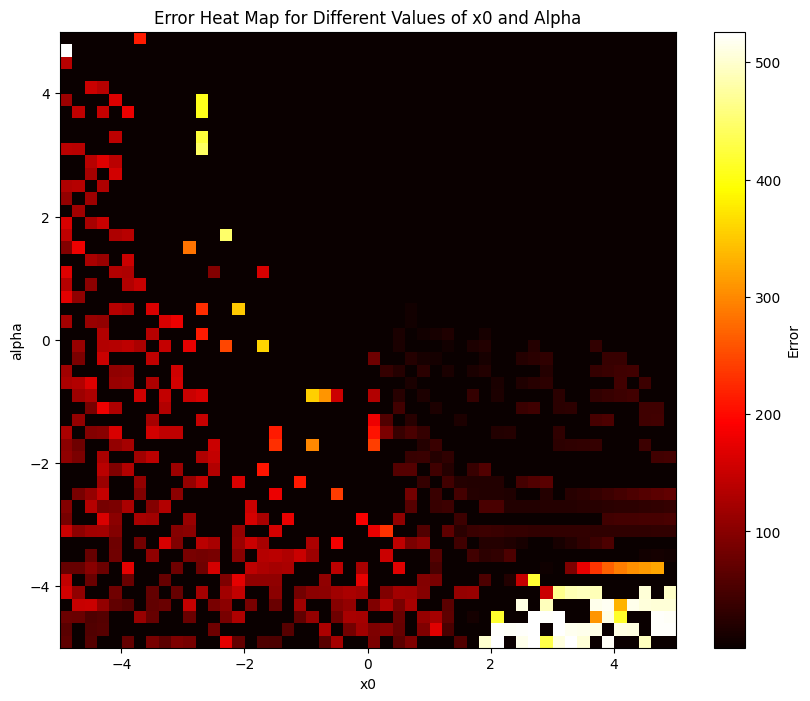

In [3]:
# "zooming in" to see how smaller changes in initial values affect minimas...
num_runs = 1
noise_level = 1
num_data_points = 10

all_params = []
errors = []

# Generate Data
data = data_gen(num_data_points, noise_level)

# Define the range for alpha and x0
alpha_range = np.linspace(-5, 5, 50)  # Adjust the range as needed
x0_range = np.linspace(-5, 5,50)  # Adjust the range as needed

# Compute the error matrix
error_mat = error_matrix(alpha_range, x0_range, data)

# Plotting the heat map
plt.figure(figsize=(10, 8))
# The extent should be set to the range of x0 and alpha values
# If x0_range and alpha_range are not starting from 0, adjust the extent accordingly
extent = [x0_range[0], x0_range[-1], alpha_range[0], alpha_range[-1]]
plt.imshow(error_mat, cmap='hot', interpolation='nearest', extent=extent, origin='lower')
plt.colorbar(label='Error')
plt.xlabel('x0')
plt.ylabel('alpha')
plt.title('Error Heat Map for Different Values of x0 and Alpha')
plt.show()

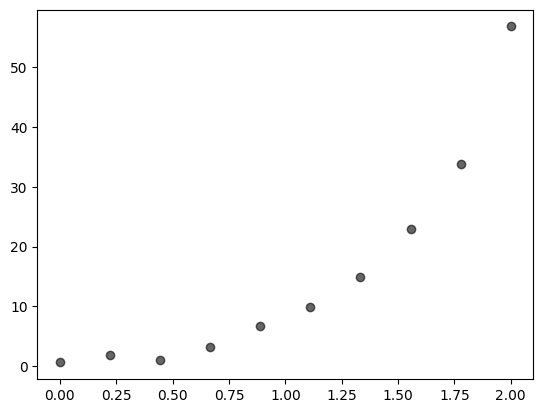

In [4]:
#Plot the data
plt.scatter(data['Time'], data['Data'], label='Noisy Data', color='k', alpha=0.6)


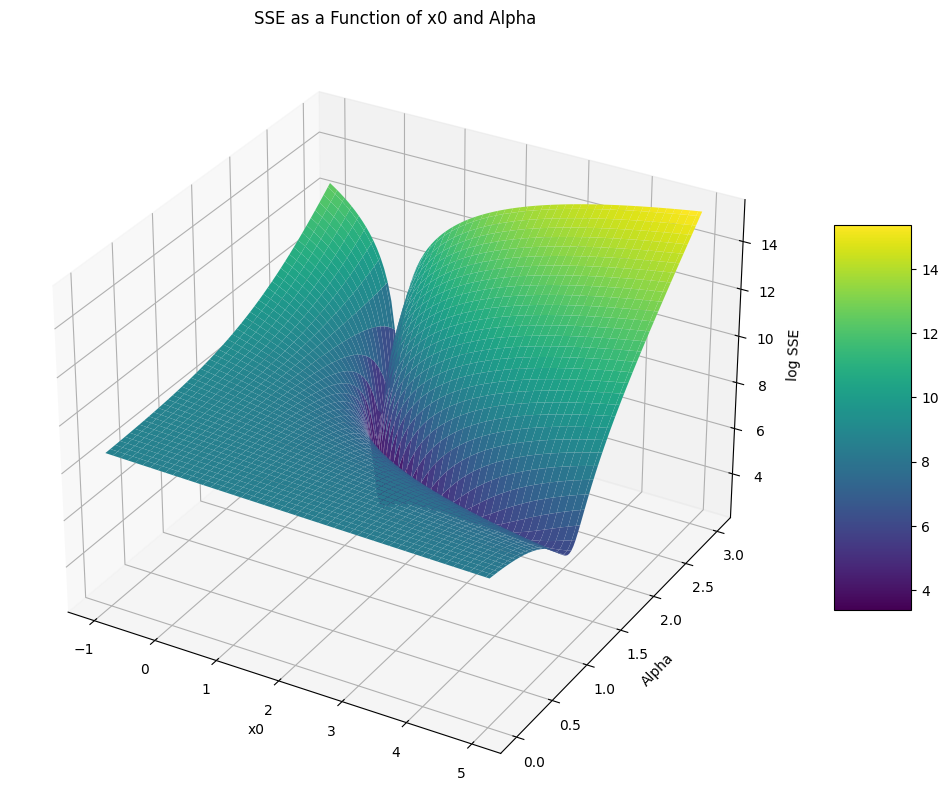

In [14]:
from mpl_toolkits.mplot3d import Axes3D


# Define the range for alpha and x0
alpha_range = np.linspace(0, 3, 100)  # Adjust the range as needed
x0_range = np.linspace(-1, 5, 100)  # Adjust the range as needed

# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)

# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)

# Calculate SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data['Time'], data['Data'])

# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

# Colorbar to show the SSE scale
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


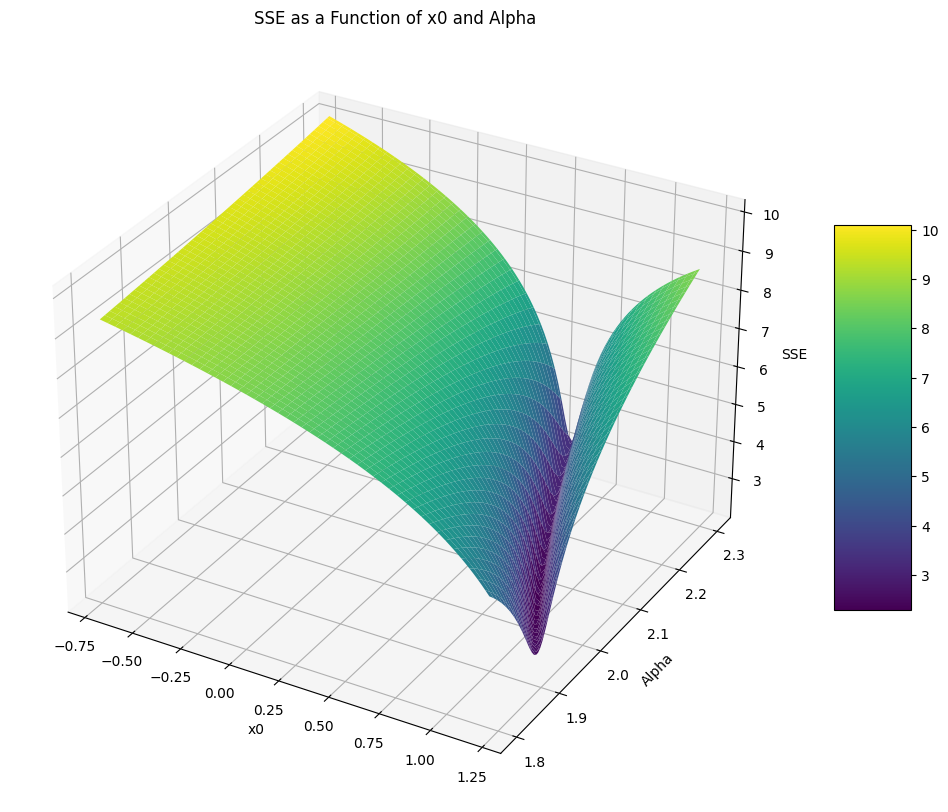

In [22]:
from mpl_toolkits.mplot3d import Axes3D


# Define the range for alpha and x0
alpha_range = np.linspace(1.8, 2.3, 100)  # Adjust the range as needed
x0_range = np.linspace(-0.7, 1.2, 100)  # Adjust the range as needed

# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)

# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)

# Calculate SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data['Time'], data['Data'])

# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

# Colorbar to show the SSE scale
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


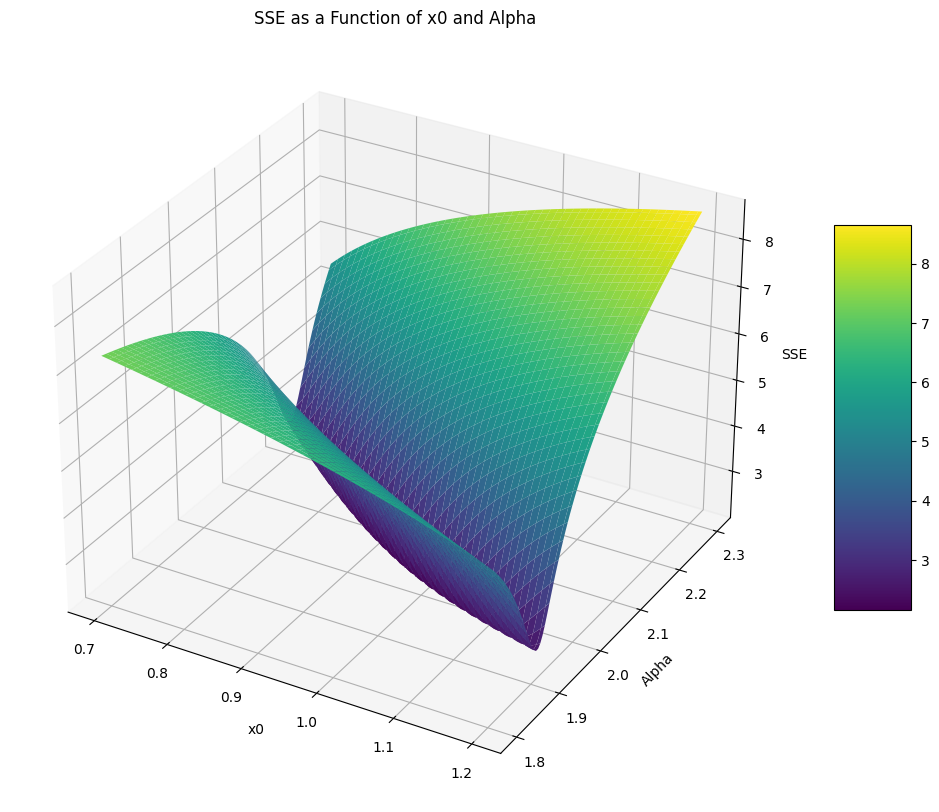

In [7]:
#PLOTTTING ON LOG SCALE


from mpl_toolkits.mplot3d import Axes3D


# Define the range for alpha and x0
alpha_range = np.linspace(1.8, 2.3, 100)  # Adjust the range as needed
x0_range = np.linspace(0.7, 1.2, 100)  # Adjust the range as needed

# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)

# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)

# Calculate SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data['Time'], data['Data'])

# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

# Colorbar to show the SSE scale
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


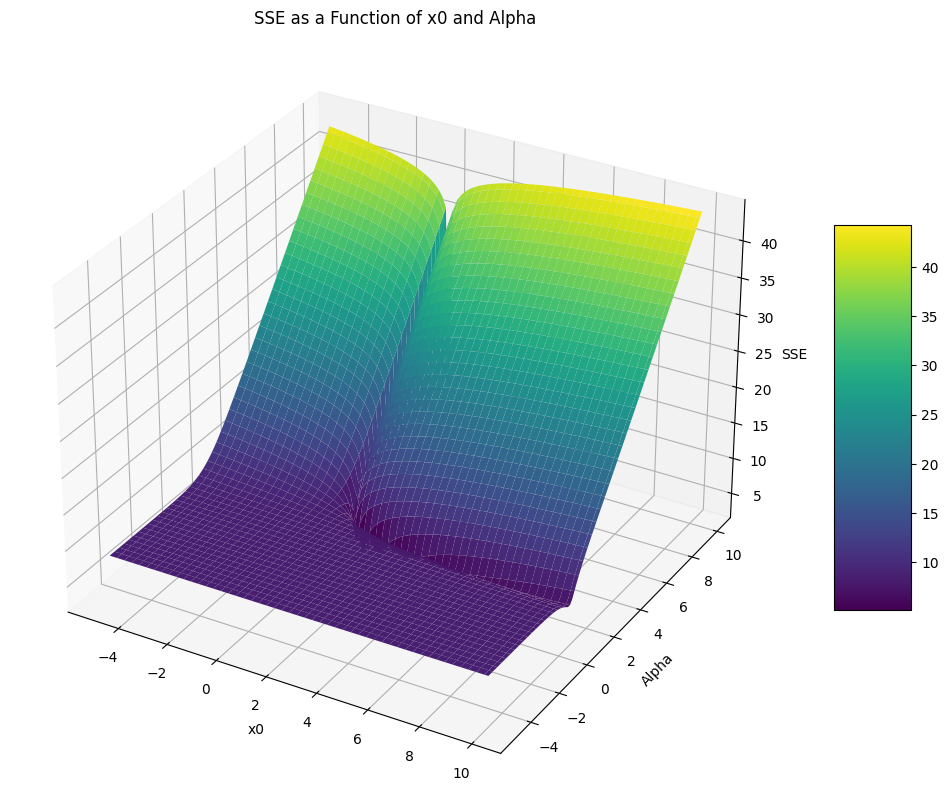

In [21]:
from mpl_toolkits.mplot3d import Axes3D


# Define the range for alpha and x0
alpha_range = np.linspace(-5, 10, 100)  # Adjust the range as needed
x0_range = np.linspace(-5, 10, 100)  # Adjust the range as needed

# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)

# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)

# Calculate SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data['Time'], data['Data'])

# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

# Colorbar to show the SSE scale
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [29]:
# Plotting the plots with high error.

# Threshold for what you consider a high error
high_error_threshold = 5  # Adjust this based on your color scale

# Find indices of high errors
high_error_indices = np.where(error_mat > high_error_threshold)

# Retreiving the initial values that caused the high errors...
high_error_initial_values = [(x0_range[j], alpha_range[i]) for i, j in zip(*high_error_indices)]

for x in high_error_initial_values:
    #print(x)
    pass

# Extract time and original noisy data for plotting
t_data = data['Time']
x_data = data['Data']

# Plot the original noisy data
plt.figure(figsize=(12, 8))
#plt.scatter(t_data, x_data, label='Noisy Data', color='gray', alpha=0.5)

# Plot each high-error model output
for i, j in zip(*high_error_indices):
    alpha = alpha_range[i]
    x0 = x0_range[j]
    model_output = model(t_data, x0, alpha)
    #plt.plot(t_data, model_output, label=f'High Error Model: alpha={alpha:.2f}, x0={x0:.2f}')

#plt.plot(t_data, model(t_data, 2.5, 0.3), label=f'test')
#plt.title('Original Noisy Data and High-Error Model Outputs')
#plt.xlabel('Time')
#plt.ylabel('Data Value')
#plt.legend()
#plt.show()


<Figure size 1200x800 with 0 Axes>

In [64]:
# Using GROEBNER BASIS to find number of minimas (4 datapoint exponential case)

# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Example data points (replace with your actual data)
# Must be rational for Groebner function to work...
x_i = [1, 2, sp.Rational(401, 100), 7]  # Data
t_i = [0, 1, 2, 3]  # Time

#plt.scatter(t_i, x_i, color='blue', label='Data Points')


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
467238928137046807*b**9/405729935206888804 + 32115904073191902801*b**8/40572993520688880400 - 38296315328474803*b**7/405729935206888804 - 981674101477441197*b**6/405729935206888804 - 2156093110563984219*b**5/405729935206888804 - 679318271110671250*b**4/101432483801722201 - 2345916464134390119*b**3/202864967603444402 - 62825886243479167601*b**2/10143248380172220100 - 285640938032542152*b/101432483801722201 + x0 - 115638180184737201/101432483801722201 

b**10 - 49199*b**9/280700 + 1699*b**8/2807 - 7396*b**7/2807 - 5919*b**6/2807 - 1760601*b**5/280700 - 14937*b**4/2807 - 61543*b**3/20050 - 4306*b**2/2807 - 1102*b/2807 - 200/2807 



In [73]:
b = symbols('b')

def sturm_sequence(p):
    p0 = p
    p1 = diff(p, b)
    sturm_seq = [p0, p1]

    # Generate the rest of the Sturm sequence using sympy's polynomial division
    while not sturm_seq[-1].is_zero:
        p_i, remainder = sturm_seq[-2].as_expr(), sturm_seq[-1].as_expr()
        div_result = Poly(p_i, b).div(Poly(remainder, b))
        sturm_seq.append(-div_result[1])

    # Remove the last polynomial if it's zero.
    if sturm_seq[-1].is_zero:
        sturm_seq.pop()

    return [p.as_expr() for p in sturm_seq]

def count_sign_changes(sequence, value):
    signs = [p.subs(b, value) for p in sequence]
    sign_changes = 0
    previous_sign = None
    for sign in signs:
        current_sign = sign > 0
        if previous_sign is not None and current_sign != previous_sign:
            sign_changes += 1
        previous_sign = current_sign

    return sign_changes

def count_positive_roots(p):
    sturm_seq = sturm_sequence(Poly(p, b))

    # Count sign changes at positive infinity and zero.
    sign_changes_at_inf = count_sign_changes(sturm_seq, 1e10)  # Simulate positive infinity.
    sign_changes_at_zero = count_sign_changes(sturm_seq, 0) #INCLUDING 0

    return sign_changes_at_zero - sign_changes_at_inf 

# Example usage:
#x = symbols('x')
#p = x**2 - 6*x # Define your polynomial here.




num_positive_roots = count_positive_roots(B[1])

print(f'Number of positive roots: {num_positive_roots}')


Number of positive roots: 1


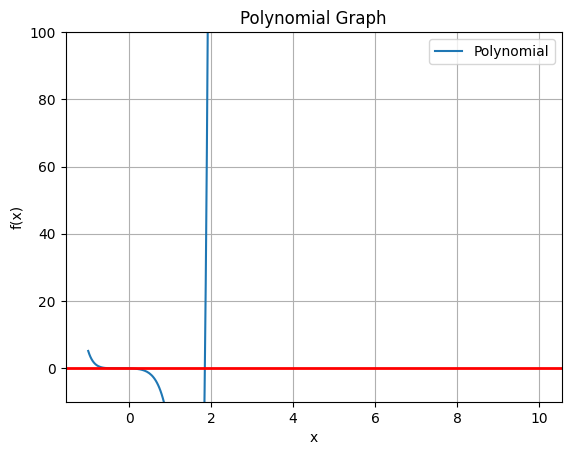

In [71]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**10 - 49199*b**9/280700 + 1699*b**8/2807 - 7396*b**7/2807 - 5919*b**6/2807 - 1760601*b**5/280700 - 14937*b**4/2807 - 61543*b**3/20050 - 4306*b**2/2807 - 1102*b/2807 - 200/2807 


# Generate x values
x_values = np.linspace(-1, 10, 400)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-10, 100)
plt.show()

In [78]:
#Checking Number of Positive roots NUMBERICALLY using sympy

x = symbols('x')
# Define your polynomial
polynomial = poly_func(x)

# Solve polynomial
roots = solve(polynomial, x)

# Filter positive roots
positive_roots_symbolic = [root.evalf() for root in roots if root.is_real and root > 0]

print(f"Symbolically found positive roots: {positive_roots_symbolic}")


Symbolically found positive roots: [1.84598025888549]


In [80]:
#Checking that the positive roots are MINIMAS




In [179]:
# How many points can Groebner function handle within reasonable 3min on my laptop.

# Using GROEBNER BASIS to find number of minimas (4 datapoint exponential case)

# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Example data points (replace with your actual data)
# Must be rational for Groebner function to work...
x_i = [1, 2, sp.Rational(401, 100), 7, 18, 33, 69, 130, 260, 555, 1030]  # Data
t_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Time

#plt.scatter(t_i, x_i, color='blue', label='Data Points')


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
-61236361560139996527296610819902124977564221627507049771029694475014476300920147873673528229835000*b**37/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 - 7828710259172606855894891204598277288321656075293433885390940251135130096557189908465417480227500*b**36/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 - 702384079455216689317571176819491997634281371205519721466236847822291617992129421080901656335000*b**35/6633707409972094464097995478408438655351846681846891917019047038848522105051112992965324701540163757 + 139541535437031835695604471964537648329930234651682755226413898008368053766195494749229925543978000*b**34/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 + 334708980234566124394404307844356654027485766890062161093775197545104703122643368729185753567430772500*b**33/663370740997209446409799547840843865

[0, 1, 2, 3, 4, 5] [1, -2513/100, 574, -376997/100, 25891369/100, -26095133/50]
Number of positive roots: 3


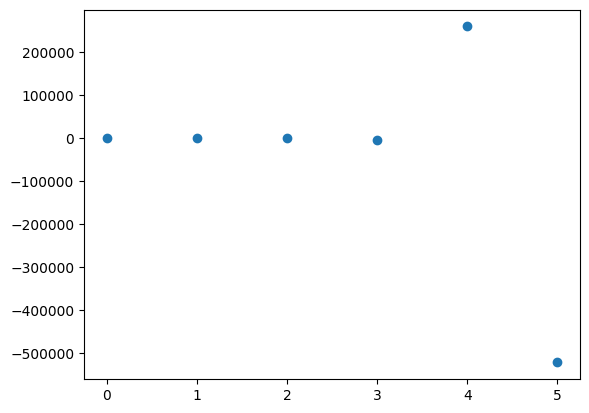

In [182]:
def generate_almost_exponential_data(n, initial_value=1, growth_rate=2, variability=0.1):
    """
    Generate n data points that follow an almost exponential trend.

    Parameters:
    - n: Number of data points to generate.
    - initial_value: Starting value of the exponential function.
    - growth_rate: Base growth rate of the exponential function.
    - variability: Maximum percentage of variability to apply to each data point.

    Returns:
    - x_i: List of n data points.
    - t_i: List of n time points.
    """
    t_i = list(range(n))  # Generate time points from 0 to n-1
    x_i = []

    for t in t_i:
        # Calculate the exact exponential value
        exact_value = initial_value * growth_rate ** t

        # Apply variability: Randomly adjust the growth rate within the variability range
        adjusted_growth_rate = growth_rate * (1 + random.uniform(-variability, variability))
        adjusted_value = initial_value * adjusted_growth_rate ** t

        # Ensure the output is rational for compatibility with Groebner function
        rational_value = sp.Rational(int(adjusted_value * 100), 100)

        x_i.append(rational_value)
    
    plt.scatter(t_i, x_i)
    print(t_i, x_i)
    return x_i, t_i


x_i, t_i = generate_almost_exponential_data(6, 1, 2, 20)


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

 
num_positive_roots = count_positive_roots(B[1])

print(f'Number of positive roots: {num_positive_roots}')

In [183]:
print(B[1])

b**18 + 2014109729034191*b**17/1351277435214154 - 187572480870325*b**16/193039633602022 + 7332741512061*b**15/1821128618887 - 2020307998805842*b**14/675638717607077 + 634126990280753*b**13/96519816801011 - 63857234161912*b**12/12747900332209 + 879621637572431*b**11/96519816801011 - 4748559639982530*b**10/675638717607077 + 15751628077023371*b**9/1351277435214154 - 6112685870765874*b**8/675638717607077 + 1422805018594086*b**7/675638717607077 - 44786207871371*b**6/675638717607077 + 724331608852*b**5/96519816801011 - 459799515485*b**4/1351277435214154 + 10367810722*b**3/675638717607077 - 272793200*b**2/675638717607077 + 17785169*b/1351277435214154 - 17950/96519816801011


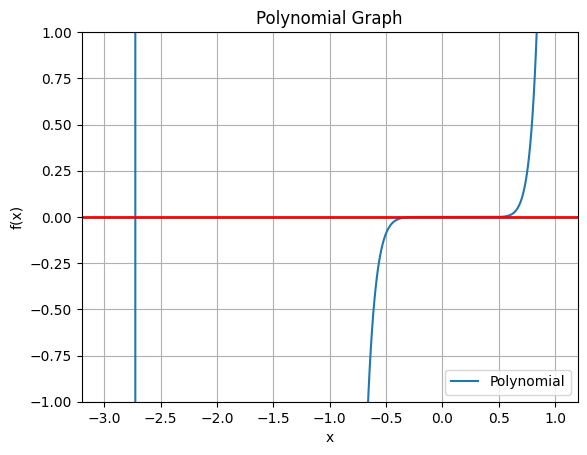

In [196]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**18 + 2014109729034191*b**17/1351277435214154 - 187572480870325*b**16/193039633602022 + 7332741512061*b**15/1821128618887 - 2020307998805842*b**14/675638717607077 + 634126990280753*b**13/96519816801011 - 63857234161912*b**12/12747900332209 + 879621637572431*b**11/96519816801011 - 4748559639982530*b**10/675638717607077 + 15751628077023371*b**9/1351277435214154 - 6112685870765874*b**8/675638717607077 + 1422805018594086*b**7/675638717607077 - 44786207871371*b**6/675638717607077 + 724331608852*b**5/96519816801011 - 459799515485*b**4/1351277435214154 + 10367810722*b**3/675638717607077 - 272793200*b**2/675638717607077 + 17785169*b/1351277435214154 - 17950/96519816801011


# Generate x values
x_values = np.linspace(-3, 1, 400)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-1, 1)
plt.show()

In [198]:
#Checking Number of Positive roots NUMBERICALLY using sympy

x = symbols('x')
# Define your polynomial
polynomial = poly_func(x)

# Solve polynomial
roots = solve(polynomial, x)

# Filter positive roots
positive_roots_symbolic = [root.evalf() for root in roots if root.is_real and root > 0]

print(f"Symbolically found positive roots: {positive_roots_symbolic}")


KeyboardInterrupt: 

In [2]:
def SSE(x0, b, x_i, t_i):
    return sum((x_i - x0 * b**t_i)**2)

# Assuming x_i, t_i are your data points and time points arrays

x0_range = np.linspace(-200, 200, 100)
b_range = np.linspace(-10, 0, 100)
x0, b = np.meshgrid(x0_range, b_range)

# Calculate SSE values over the grid
sse_values = np.array([SSE(x0_val, b_val, x_i, t_i) for x0_val, b_val in zip(np.ravel(x0), np.ravel(b))])
sse_values = sse_values.reshape(x0.shape)

sse_values = np.array(sse_values, dtype=float)

# Adjust the SSE values to avoid issues with log(0)
sse_values_log = np.log(np.abs(sse_values) + 1e-10)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Use sse_values_log for the Z axis
ax.plot_surface(x0, b, sse_values_log, cmap='viridis')

ax.set_xlabel('x0')
ax.set_ylabel('Beta')
ax.set_zlabel('Log(SSE)')

plt.show()


NameError: name 'x_i' is not defined

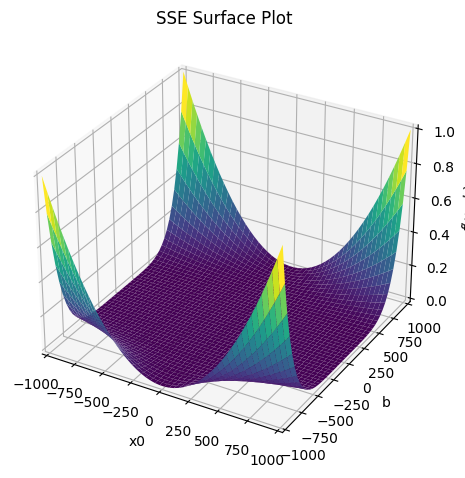

In [82]:


# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Example data points (replace with your actual data)
x_i = [1, 2, 4.01, 7]  # Data
t_i = [0, 1, 2, 3]  # Time

#plt.scatter(t_i, x_i, color='blue', label='Data Points')


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * (b**t))**2 for x, t in zip(x_i, t_i)])

plot = spp.plot3d(SSE_poly, (x0, -1000, 1000), (b, -1000, 1000), title='SSE Surface Plot', xlabel='x0', ylabel='b', show=False)

plot.show()



In [83]:

# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Example data points (replace with your actual data)
x_i = [1, 2, 4.01, 7]  # Data
t_i = [0, 1, 2, 3]  # Time

#plt.scatter(t_i, x_i, color='blue', label='Data Points')


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * (b**t))**2 for x, t in zip(x_i, t_i)])


grad = sp.derive_by_array(SSE_poly, (x0, b))

print(grad)

[-2*b**3*(-b**3*x0 + 7) - 8.02*b**2*(-0.249376558603491*b**2*x0 + 1) - 2*b*(-b*x0 + 2) + 2*x0 - 2, -6*b**2*x0*(-b**3*x0 + 7) - 16.04*b*x0*(-0.249376558603491*b**2*x0 + 1) - 2*x0*(-b*x0 + 2)]


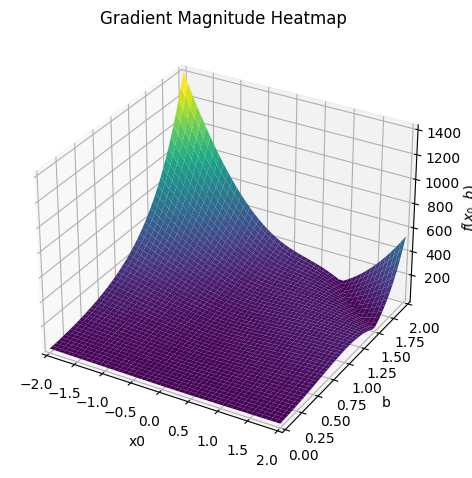

In [87]:
gradient_magnitude = sp.sqrt(grad[0]**2 + grad[1]**2)

# Define the ranges for x0 and b to be plotted
x0_range = (-2, 2)
b_range = (0, 2)

gradient_magnitude_plot = spp.plot3d(gradient_magnitude, (x0, x0_range[0], x0_range[1]), (b, b_range[0], b_range[1]),
                                     title='Gradient Magnitude Heatmap', xlabel='x0', ylabel='b', show=False)

gradient_magnitude_plot.show()


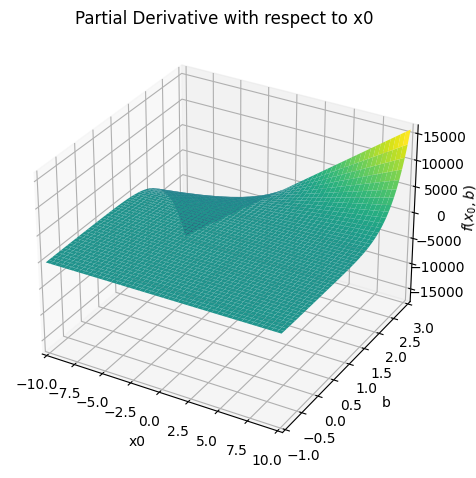

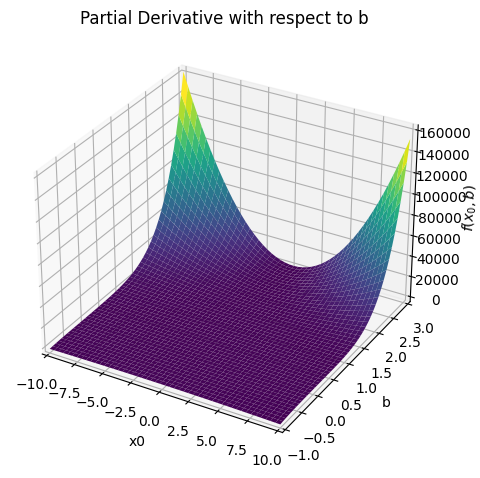

In [88]:
# Plot the partial derivative with respect to x0
plot_partial_x0 = spp.plot3d(partial_x0, (x0, -10, 10), (b, -1, 3),
                             title='Partial Derivative with respect to x0',
                             xlabel='x0', ylabel='b', show=False)
plot_partial_x0.show()

# Plot the partial derivative with respect to b
plot_partial_b = spp.plot3d(partial_b, (x0, -10, 10), (b, -1, 3),
                            title='Partial Derivative with respect to b',
                            xlabel='x0', ylabel='b', show=False)
plot_partial_b.show()